In [9]:
%load_ext autoreload
%autoreload 2
from modules.data.load.loaders import PointCloudLoader
from modules.data.preprocess.preprocessor import PreProcessor
from modules.utils.utils import (
    load_dataset_config,
    describe_data,
    load_transform_config,
    load_model_config,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# loader = PointCloudLoader(
#     {
#         "num_classes": 3,
#         "data_dir": "modules/transforms/liftings/pointcloud2simplicial/",
#     }
# )

dataset_name = "random_dataset"
dataset_config = load_dataset_config(dataset_name)
loader = PointCloudLoader(dataset_config)

dataset = loader.load()


Dataset configuration for random_dataset:

{'data_domain': 'pointcloud',
 'data_type': 'toy_dataset',
 'data_name': 'random_dataset',
 'data_dir': 'datasets/pointcloud/toy_dataset',
 'num_features': 1,
 'num_classes': 2,
 'task': 'classification',
 'loss_type': 'cross_entropy'}


Processing...
Done!


In [11]:
transform_type = "liftings"
# If the transform is a topological lifting, it should include both the type of the lifting and the identifier
transform_id = "pointcloud2simplicial/vietoris_rips_lifting"

# Read yaml file
transform_config = {
    "lifting": load_transform_config(transform_type, transform_id)
    # other transforms (e.g. data manipulations, feature liftings) can be added here
}


Transform configuration for pointcloud2simplicial/vietoris_rips_lifting:

{'transform_type': 'lifting',
 'transform_name': 'VietorisRipsLifting',
 'complex_dim': 2,
 'feature_lifting': 'ProjectionSum',
 'epsilon': 0.5}


In [12]:
lifted_dataset = PreProcessor(dataset, transform_config, loader.parameters["data_dir"])

Processing...
/Users/elphicm/mambaforge/envs/topox/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Done!



Dataset only contains 1 sample:


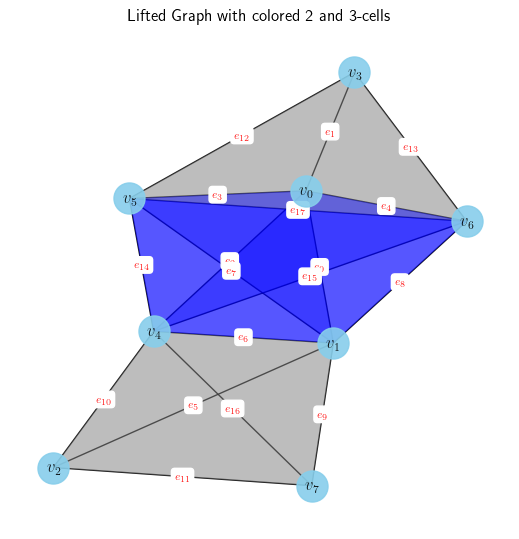

 - The complex has 8 0-cells.
 - The 0-cells have features dimension 1
 - The complex has 18 1-cells.
 - The 1-cells have features dimension 1
 - The complex has 17 2-cells.
 - The 2-cells have features dimension 1
 - The complex has 7 3-cells.
 - The 3-cells have features dimension 1
 - The complex has 1 4-cells.
 - The 4-cells have features dimension 1



In [13]:
describe_data(lifted_dataset)

In [14]:
from modules.models.simplicial.san import SANModel

model_type = "simplicial"
model_id = "san"
model_config = load_model_config(model_type, model_id)

model = SANModel(model_config, dataset_config)


Model configuration for simplicial SAN:

{'in_channels': None,
 'hidden_channels': 32,
 'out_channels': None,
 'n_layers': 2,
 'n_filters': 2,
 'order_harmonic': 5,
 'epsilon_harmonic': 0.1}


In [17]:
y_hat = model(lifted_dataset.get(0))

y_hat

tensor([[0.5710, 0.5974],
        [0.5751, 0.5552],
        [0.5592, 0.6042],
        [0.5718, 0.6019],
        [0.5619, 0.6089],
        [0.5743, 0.5460],
        [0.5607, 0.6206],
        [0.5710, 0.5974],
        [0.5678, 0.5981],
        [0.5716, 0.5490],
        [0.5647, 0.5582],
        [0.5831, 0.5089],
        [0.5751, 0.5552],
        [0.5797, 0.5526],
        [0.5592, 0.6042],
        [0.5548, 0.6062],
        [0.5681, 0.5536],
        [0.5619, 0.6089]], grad_fn=<SigmoidBackward0>)